#### Importacion de librerias 

In [127]:
import random
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from scipy.stats import truncnorm

#### Leyendo el dataset

In [128]:
df = pd.read_csv('StudentsPerformance.csv')

In [129]:
df.head(5)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Cantidad de registros

In [130]:
df.shape[0]

1000

#### Explicacion de columnas

####
 id → Identificador único para cada estudiante.
####
  gender → Género del estudiante (male o female).
####
 race → Grupo étnico al que pertenece el estudiante (group A, group B, etc.).
####
 parental_level_of_education → Nivel educativo más alto alcanzado por los padres (some college, bachelor's degree, etc.).
####
 lunch → Tipo de almuerzo que recibe el estudiante (standard o free/reduced).
####
 test_preparation_course → Si el estudiante completó un curso de preparación para los exámenes (none o completed).
####
 math_score → Puntuación obtenida en el examen de matemáticas (escala de 0 a 100).
####
 reading_score → Puntuación obtenida en el examen de lectura (escala de 0 a 100).
####
 writing_score → Puntuación obtenida en el examen de escritura (escala de 0 a 100).
####
 GPA → Promedio general del estudiante convertido a una escala de 4.0.

##### Analizando tipos de datos en las columnas

In [131]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

##### Agregando un id para visualizar mejor

In [132]:
df.insert(0, 'id', range(1, len(df) + 1)) 

#### Generando una nueva columna GPA(Grade Point Average) a partir de las notas del df, para hacer un analisas mas completo

In [133]:
df["GPA"] = df[["math score", "reading score", "writing score"]].mean(axis=1) * (4 / 100)

In [134]:
df.head(3)

,id,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA
0,1,female,group B,bachelor's degree,standard,none,72,72,74,2.906667
1,2,female,group C,some college,standard,completed,69,90,88,3.293333
2,3,female,group B,master's degree,standard,none,90,95,93,3.706667


In [135]:
df.columns

Index(['id', 'gender', 'race/ethnicity', 'parental level of education',
       'lunch', 'test preparation course', 'math score', 'reading score',
       'writing score', 'GPA'],
      dtype='object')

##### Limpiando nombres de columnas

In [136]:
df.columns = ['id','gender', 'race', 'parental_level_of_education', 'lunch',
        'test_preparation_course', 'math_score', 'reading_score',
        'writing_score', 'GPA']

#### Columnas con su tipo de dato

In [137]:
df.dtypes

id                               int64
gender                          object
race                            object
parental_level_of_education     object
lunch                           object
test_preparation_course         object
math_score                       int64
reading_score                    int64
writing_score                    int64
GPA                            float64
dtype: object

#### columnas categoricas

In [138]:
cat_cols = []

for c in df.columns:
    if df[c].dtype == 'O':
        cat_cols.append(c)


In [139]:
cat_cols

['gender',
 'race',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

#### columnas numericas

In [140]:
num_cols = []

for c in df.columns:
    if df[c].dtype == 'int64' or df[c].dtype == 'float64': 
        num_cols.append(c)


In [141]:
num_cols

['id', 'math_score', 'reading_score', 'writing_score', 'GPA']

#### Descripcion de datos numericos

In [142]:
df.describe()

,id,math_score,reading_score,writing_score,GPA
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,66.08900,69.169000,68.054000,2.710827
std,288.819436,15.16308,14.600192,15.195657,0.570293
min,1.000000,0.00000,17.000000,10.000000,0.360000
25%,250.750000,57.00000,59.000000,57.750000,2.333333
50%,500.500000,66.00000,70.000000,69.000000,2.733333
75%,750.250000,77.00000,79.000000,79.000000,3.106667
max,1000.000000,100.00000,100.000000,100.000000,4.000000


#### Histograma de las variables numericas 

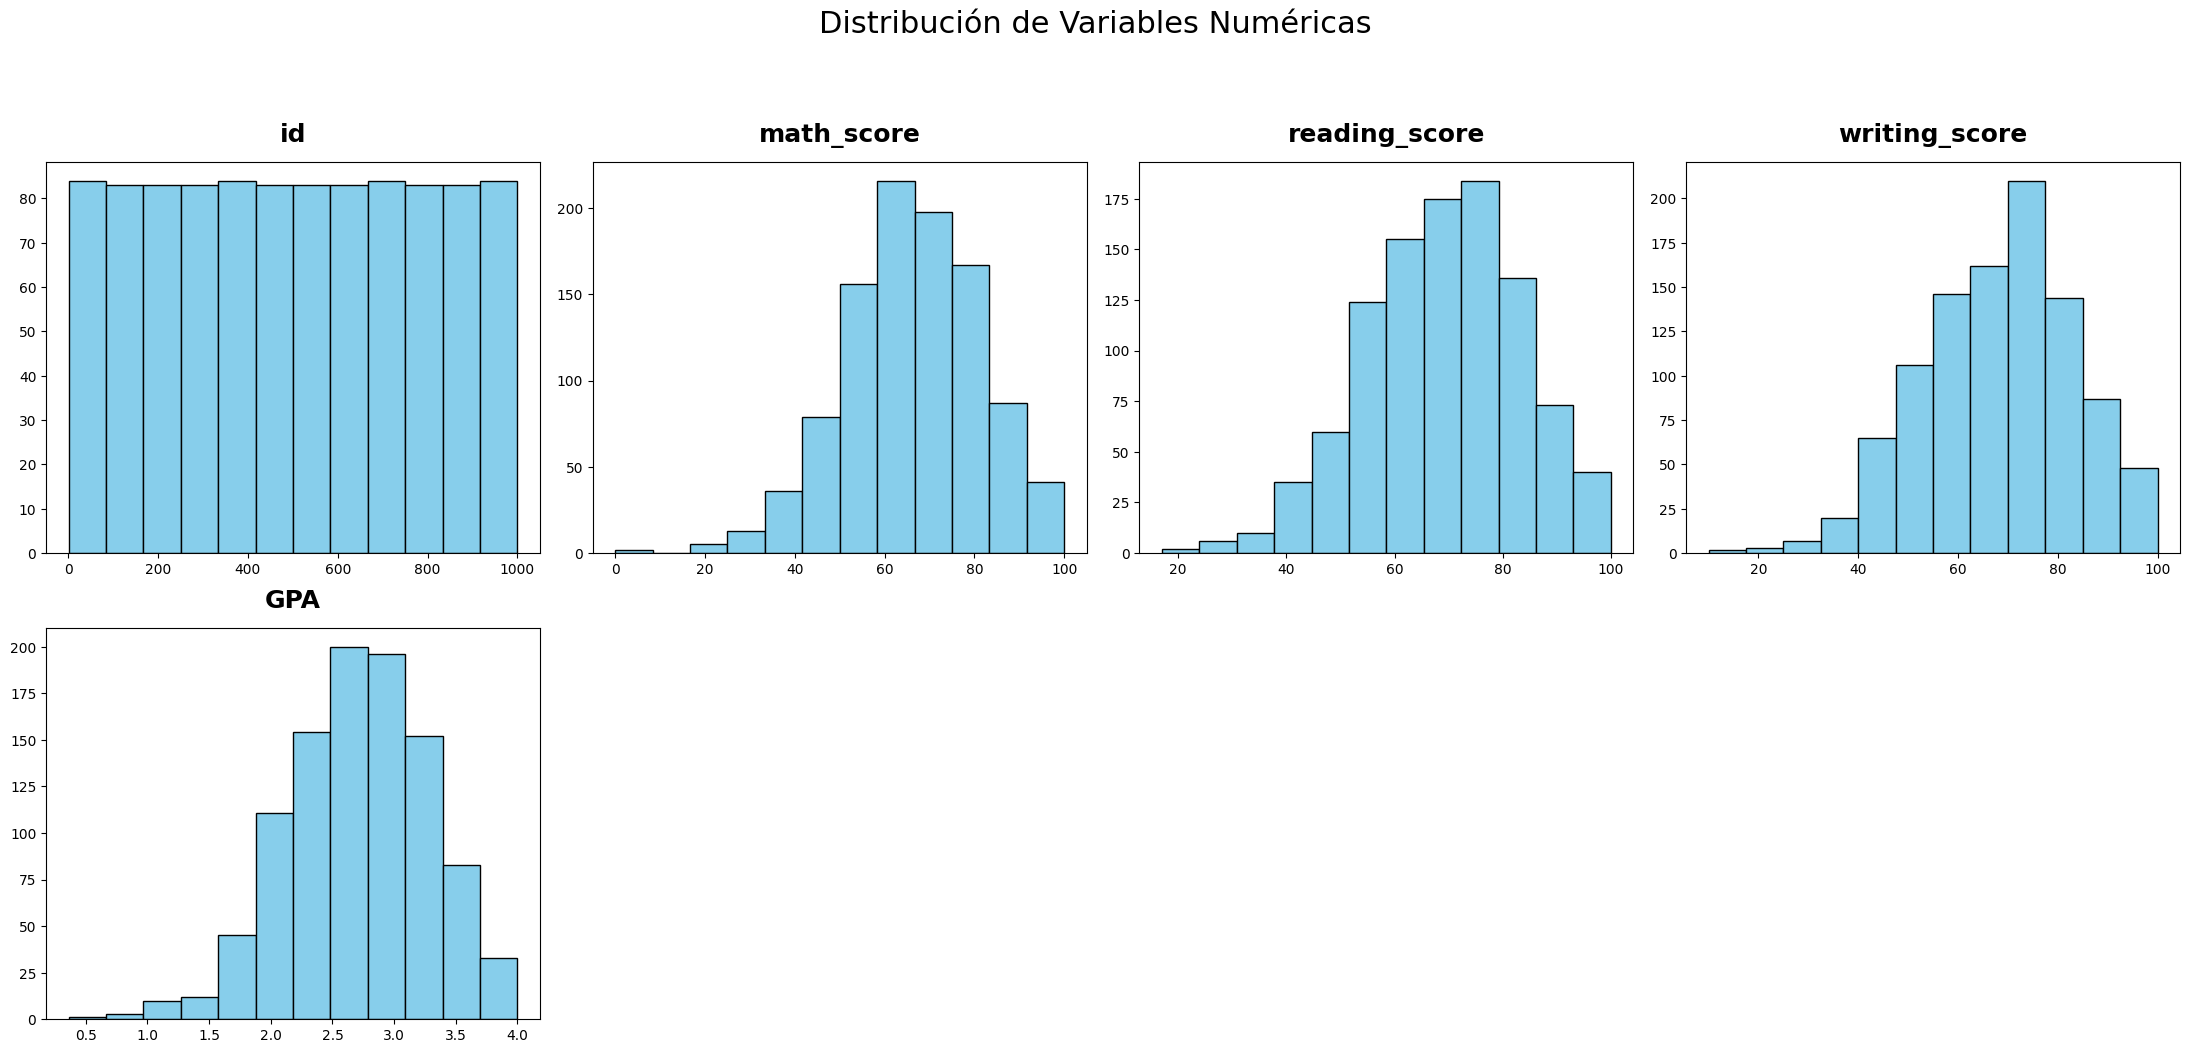

In [143]:
import matplotlib.pyplot as plt

axes = df.select_dtypes(include=['int64', 'float64']).hist(
    figsize=(22, 19), bins=12, edgecolor='black', layout=(4, 4), grid=False, color='skyblue'
)

for ax in axes.flatten():
    ax.set_title(ax.get_title(), fontsize=18,y = 1.03, fontweight='bold') 
    ax.set_xlabel(ax.get_xlabel(), fontsize=14)  # Ajusta tamaño del label en X
    ax.set_ylabel(ax.get_ylabel(), fontsize=16)  # Ajusta tamaño del label en Y

plt.suptitle('Distribución de Variables Numéricas', fontsize=22, y=1.03)

plt.tight_layout()
plt.show()


### Distribuciones de las categorías principales

In [146]:
prob_freq = df.groupby( cat_cols , as_index=False ).agg({
    "id": ["count"]
})

prob_freq.columns = cat_cols + ["count"]

In [147]:
prob_freq

,gender,race,parental_level_of_education,lunch,test_preparation_course,count
0,female,group A,associate's degree,free/reduced,none,3
1,female,group A,associate's degree,standard,completed,2
2,female,group A,associate's degree,standard,none,1
3,female,group A,bachelor's degree,standard,none,3
4,female,group A,high school,free/reduced,completed,3
...,...,...,...,...,...,...
206,male,group E,some college,standard,completed,4
207,male,group E,some college,standard,none,12
208,male,group E,some high school,free/reduced,completed,2
209,male,group E,some high school,standard,completed,6
